Training on a custom cattle and dog dataset with 20% of the data as a validation split.

# New section

# Yolov8-pt model  
Designed for small objects using experiment 3. Try it on the combined_pascal_vok2 which combines a number of autoanimated images as well as my old training data from last year. I will use the baseline pt model (rather than one I have previously trained).

In [ ]:
!pip install ultralytics
#!pip install roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 12.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-

In [ ]:
#!pip install roboflow

#from roboflow import Roboflow
#rf = Roboflow(api_key="HUDwR2FrFtyEePrLmS9Q")
#project = rf.workspace("dpi-7cd3r").project("dot-finder-qcx51")
#dataset = project.version(2).download("yolov8")
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!cat /content/drive/MyDrive/Colab\ Notebooks/YOLODataset/dataset.yaml


train: ./images/train/
val: ./images/val/
nc: 2
names: ["cattle", "dog"]


In [ ]:
from ultralytics import YOLO
#s
# https://github.com/ultralytics/ultralytics/issues/981
model = YOLO('yolov8l-p2.yaml').load('yolov8l.pt')

100%|██████████| 83.7M/83.7M [00:00<00:00, 589MB/s]


Transferred 419/725 items from pretrained weights


In [ ]:
!ls /content/drive/MyDrive/Colab\ Notebooks/YOLODataset/

dataset.yaml  images  labels


In [ ]:
# model=yolov8l.pt
#!yolo task=detect mode=train model={model} data={dataset.location}/data.yaml epochs=300 rect=True
results = model.train(
    data='/content/drive/MyDrive/Colab Notebooks/YOLODataset/dataset.yaml',
    rect=False,
    epochs=200,
    name='yolov8l-pt'
)


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
engine/trainer: task=detect, mode=train, model=yolov8l-p2.yaml, data=/content/drive/MyDrive/Colab Notebooks/YOLODataset/dataset.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8l-pt, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_cr

100%|██████████| 755k/755k [00:00<00:00, 116MB/s]


Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  3    279808  ultralytics.nn.modules.block.C2f             [128, 128, 3, True]           
  3                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  4                  -1  6   2101248  ultralytics.nn.modules.block.C2f             [256, 256, 6, True]           
  5                  -1  1   1180672  ultralytics.nn.modules.conv.Conv             [256, 512, 3, 2]              
  6                  -1  6   8396800  ultralytics.nn.modules.block.C2f             [512, 512, 6, True]           
  7                  -1  1   2360320  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 363MB/s]
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/Colab Notebooks/YOLODataset/labels/train... 511 images, 2 backgrounds, 1 corrupt: 100%|██████████| 511/511 [01:09<00:00,  7.40it/s]

train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/YOLODataset/images/train/216e4a9ca9d967dbb7f2989de4bf72da.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [      1.979]
train: WARNING ⚠️ /content/drive/MyDrive/Colab Notebooks/YOLODataset/images/train/8d22f4facdb2a7035272586335030bce.png: 1 duplicate labels removed


train: New cache created: /content/drive/MyDrive/Colab Notebooks/YOLODataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLODataset/labels/val... 128 images, 3 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:21<00:00,  5.86it/s]


val: New cache created: /content/drive/MyDrive/Colab Notebooks/YOLODataset/labels/val.cache
Plotting labels to runs/detect/yolov8l-pt/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 118 weight(decay=0.0), 127 weight(decay=0.0005), 126 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/yolov8l-pt
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/32 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
      1/200      16.4G      2.893      3.371      4.065         54        640: 100%|██████████| 32/32 [00:24<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.29it/s]

                   all        128        230    0.00719      0.639     0.0552      0.018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      16.4G      2.355      2.871      3.555         48        640: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:07<00:00,  1.78s/it]

                   all        128        230   0.000644      0.104   0.000394   0.000106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      16.5G      2.206      2.718      3.134         48        640: 100%|██████████| 32/32 [00:22<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.56it/s]

                   all        128        230     0.0714    0.00641    0.00694     0.0018



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      16.1G      2.087      2.637       2.89         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:08<00:00,  2.18s/it]

                   all        128        230   0.000375     0.0656   0.000208   7.34e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      16.1G      1.952      2.441      2.725         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.26it/s]

                   all        128        230    0.00339     0.0296    0.00151   0.000446



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      16.1G      1.863      2.301       2.58         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all        128        230      0.594      0.128     0.0839     0.0278



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      16.3G      1.804      2.122      2.449         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.76it/s]

                   all        128        230      0.118      0.145       0.14     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      16.1G      1.707      2.004       2.36         40        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.83it/s]

                   all        128        230      0.571      0.132     0.0641     0.0266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      16.2G      1.603       1.88      2.277         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all        128        230      0.239      0.187      0.168     0.0678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      16.1G      1.602      1.848      2.267         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        128        230      0.563      0.535      0.535      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      16.1G      1.509      1.722      2.163         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        128        230      0.614      0.504      0.556        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      16.1G      1.493      1.721      2.119         65        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.508      0.683      0.593       0.31



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      16.1G      1.413      1.587      2.051         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.732      0.602      0.676      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      16.1G      1.363      1.522          2         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.659      0.583      0.628      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      16.1G       1.38      1.534      1.999         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.413      0.472      0.453      0.249



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      16.3G      1.308      1.492      1.949         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.634      0.636       0.64      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      16.1G      1.345       1.46      1.973         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.591      0.573      0.591      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      16.1G      1.298       1.45      1.928         88        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.665      0.609      0.625      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      16.1G      1.273        1.4      1.909         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.476      0.601      0.556      0.336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      16.1G      1.258      1.335      1.872         38        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.732      0.696      0.738      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      16.3G      1.225      1.322      1.838         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.722      0.708      0.738      0.434



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      16.2G      1.213      1.339      1.829         65        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.825      0.621      0.769      0.473



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      16.1G       1.19      1.298      1.802         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.784      0.724        0.8      0.494



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      16.2G      1.178      1.197      1.775         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.716      0.708       0.77      0.457



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      16.1G      1.133      1.182      1.754         70        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.819      0.722      0.808      0.497



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      16.1G      1.148      1.157      1.745         73        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.827      0.749      0.831      0.542



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      16.1G      1.105      1.148      1.705         57        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.731      0.727      0.767      0.488



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      16.1G       1.09      1.159      1.703         45        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.682       0.82      0.822      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      16.1G       1.06      1.129      1.684         62        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.786      0.774      0.828      0.537



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      16.1G      1.138      1.132      1.725         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.94it/s]

                   all        128        230       0.69      0.607      0.701      0.423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      16.1G      1.052      1.107      1.674         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        128        230      0.829      0.746      0.841      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      16.1G      1.009       1.07       1.62         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.737       0.69      0.757      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      16.2G      1.024      1.042      1.636         81        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.693      0.741      0.793      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/200      16.1G      1.023      1.093      1.623         37        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.813      0.739      0.813      0.516



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/200      16.1G      1.048      1.064      1.651         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.771      0.752      0.796      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/200      16.1G      1.018      1.049      1.651         47        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.718      0.667      0.798      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/200      16.1G     0.9879      1.017      1.607         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.823      0.773      0.819      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/200      16.2G     0.9873      1.011        1.6         61        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.785      0.779      0.848      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/200      16.1G     0.9431     0.9538      1.545         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.713      0.727      0.762      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/200      16.1G     0.9639     0.9747      1.579         46        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.818      0.755      0.821       0.57



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/200      16.1G     0.9362     0.9474      1.569         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.836      0.751      0.852      0.563



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/200      16.1G     0.9391     0.9816      1.553         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.751       0.76      0.827      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/200      16.1G     0.9388     0.9488      1.545         75        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.761      0.794      0.828      0.572



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/200      16.1G     0.9276     0.9443      1.538         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.818      0.749      0.807      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/200      16.2G     0.9371     0.9544      1.559         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230       0.81      0.765      0.838      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/200      16.1G     0.9533     0.9274      1.544         59        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.767      0.682       0.75      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/200      16.1G     0.9168     0.9099      1.541         44        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.819      0.807      0.871      0.596



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/200      16.1G     0.8988     0.8907      1.499         51        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.847      0.756      0.842      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/200      16.1G     0.8738     0.8612      1.491         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.838      0.755      0.849      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/200      16.1G     0.8812     0.8661      1.504         48        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.796       0.85      0.881      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/200      16.1G     0.8918     0.8579      1.486         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.802      0.772      0.855      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/200      16.1G     0.8648     0.8504       1.48         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.814      0.781      0.851      0.603



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/200      16.1G     0.8696     0.8486      1.472         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.856      0.754      0.865      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/200      16.1G     0.8477     0.8403      1.449         45        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.874      0.758      0.863       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/200      16.1G     0.8339     0.8017      1.441         39        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.802      0.737       0.83      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/200      16.1G     0.8247      0.799      1.426         57        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.874      0.768      0.878      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/200      16.2G     0.8131     0.7861      1.414         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.873      0.792      0.868      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/200      16.2G     0.8242     0.7781      1.438         68        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.822      0.833      0.887       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/200      16.1G     0.8098     0.7534      1.438         64        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        128        230      0.837      0.694      0.822      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/200      16.1G     0.8199     0.7862      1.429         68        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.861      0.784      0.872      0.602



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/200      16.1G     0.8278     0.8116      1.443         49        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.805      0.776      0.831       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/200      16.1G     0.8112     0.7581      1.434         51        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.857      0.791       0.87      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/200      16.1G     0.7953     0.7598      1.414         59        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230       0.83      0.798      0.863      0.606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/200      16.2G     0.7551     0.7289      1.386         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.837      0.804      0.877      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/200      16.2G     0.7921      0.786      1.428         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.867      0.804      0.889      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/200      16.1G     0.7776     0.7439      1.387         47        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230        0.9       0.76      0.866       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/200      16.2G     0.7645     0.7106      1.372         62        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.858      0.738      0.839      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/200      16.1G     0.7935     0.7748      1.415         59        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.96it/s]

                   all        128        230      0.885      0.788      0.857      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/200      16.1G     0.7481     0.7072      1.377         42        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.892      0.754      0.844      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/200      16.1G     0.7864     0.7585      1.404         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.806      0.725      0.838      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/200      16.2G     0.7341     0.7227      1.357         57        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.895      0.765      0.871      0.652



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/200      16.1G     0.7563     0.6848      1.374         41        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.878      0.803       0.88      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/200      16.1G     0.7555     0.7332      1.379         41        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.858      0.817      0.885      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/200      16.1G     0.7427     0.6717      1.353         66        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        128        230       0.82      0.824      0.872      0.636



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/200      16.3G     0.7467     0.6861      1.345         49        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.859      0.782      0.829      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/200      16.1G     0.7787     0.7067      1.377         48        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.856      0.817      0.892      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/200      16.1G     0.7174     0.6895      1.327         72        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.873      0.843      0.903       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/200      16.1G      0.738     0.6927      1.354         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.863      0.785      0.884      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/200      16.1G     0.7135     0.6726      1.336         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.909      0.794      0.895      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/200      16.1G     0.7215     0.6737      1.334         71        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.848      0.798      0.881      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/200      16.1G     0.7119     0.6833      1.331         74        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.908      0.814        0.9      0.679



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/200      16.1G     0.7065     0.6535      1.311         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.846      0.804      0.869       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/200      16.1G     0.6969     0.6492      1.324         72        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        128        230       0.89       0.77      0.871      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/200      16.1G     0.6871     0.6223      1.301         51        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.883      0.846      0.913      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/200      16.1G     0.6847     0.6076      1.315         43        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.855      0.835      0.891      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/200      16.1G     0.7005     0.6306      1.326         57        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.902      0.827      0.903       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/200      16.5G     0.6761      0.628      1.297         46        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230       0.92      0.804      0.892       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/200      16.2G     0.6856     0.6197      1.305         68        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.917      0.821      0.896      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/200      16.1G     0.6672     0.6115      1.295         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.858      0.816      0.888      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/200      16.1G     0.6735     0.6205      1.288         65        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230       0.87      0.845      0.897      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/200      16.1G     0.6639     0.6049      1.293         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.862      0.748       0.87      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/200      16.1G     0.6598     0.6086       1.28         71        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.893      0.801      0.892      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/200      16.1G     0.6443     0.5942      1.273         51        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230       0.91      0.795      0.886      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/200      16.1G     0.6663     0.6077      1.292         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.878      0.819      0.908      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/200      16.2G     0.6693     0.5961      1.288         67        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.847       0.84      0.892      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/200      16.3G     0.6567     0.6067      1.286         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.826      0.866      0.905      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/200      16.1G     0.6429     0.6045      1.265         38        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.906       0.76      0.879       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/200      16.1G     0.6624     0.5913      1.285         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.926      0.797      0.893      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/200      16.1G       0.64     0.5806      1.274         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.874      0.833      0.904      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/200      16.1G     0.6415     0.5905      1.259         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.819      0.876      0.906      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/200      16.2G     0.6177     0.5797      1.253         65        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        128        230      0.871      0.822      0.889      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/200      16.1G     0.6242     0.5647      1.244         62        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230       0.91      0.809      0.898      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/200      16.1G     0.6443     0.6038      1.286         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.923      0.802      0.911      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/200      16.1G     0.6096     0.5526      1.242         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.891      0.846        0.9      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/200      16.1G     0.6127      0.562      1.231         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.914      0.801      0.917      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/200      16.1G      0.603     0.5662      1.252         61        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.852      0.853      0.899      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/200      16.2G     0.6194     0.5452       1.24         33        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.885      0.807      0.892      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/200      16.1G     0.5915     0.5436      1.219         46        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.889      0.818      0.902      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/200      16.3G     0.6067     0.5439      1.243         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.905      0.817      0.895      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/200      16.1G     0.6101     0.5323      1.234         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.887      0.859      0.906      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/200      16.1G      0.615     0.5656      1.248         63        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.913       0.81      0.904      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/200      16.1G     0.5789     0.5397      1.223         48        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.901      0.836      0.908      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/200      16.1G     0.5947     0.5105      1.234         51        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.915      0.798      0.883      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/200      16.1G     0.6008     0.5249      1.216         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.919      0.836      0.915       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/200      16.3G     0.5999     0.5379      1.212         67        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.882       0.83      0.906      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/200      16.1G     0.6011      0.519      1.228         31        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.889      0.853      0.904      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/200      16.1G      0.585      0.516      1.205         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.892      0.803      0.908        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/200      16.1G     0.5618     0.4841      1.194         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.829      0.856       0.91      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/200      16.1G     0.5338     0.4858      1.164         80        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.915      0.804      0.901      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/200      16.1G     0.5683     0.5162        1.2         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230       0.84      0.827      0.893      0.689



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/200      16.1G     0.5429     0.4998      1.188         47        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.863      0.837      0.907      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/200      16.1G     0.5611     0.5184      1.187         73        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.906      0.802      0.907      0.705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/200      16.1G     0.5693     0.4925      1.195         63        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.936      0.804      0.895      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/200      16.1G      0.543     0.5022      1.188         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.868      0.856      0.904      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/200      16.1G     0.5365     0.4751       1.18         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230       0.88       0.84       0.91      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/200      16.1G     0.5411     0.4901      1.188         74        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.879      0.827       0.91      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/200      16.1G     0.5549     0.5102      1.205         69        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.912      0.854      0.918      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/200      16.1G     0.5471     0.5025      1.194         39        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.904      0.865      0.913      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    129/200      16.1G     0.5494     0.4982      1.189         74        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.896       0.83      0.905      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    130/200      16.1G     0.5417     0.5066      1.188         82        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.854      0.837      0.897       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    131/200      16.2G     0.5356     0.4896      1.166         63        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.97it/s]

                   all        128        230       0.94      0.787      0.897      0.697



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    132/200      16.2G     0.5265     0.4677      1.166         43        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.898      0.809      0.898      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      16.1G     0.5248     0.4662      1.172         59        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.898      0.856      0.916      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      16.1G      0.522     0.4784      1.167         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.881      0.837      0.909       0.71



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      16.1G     0.5191     0.4637      1.173         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.917      0.827      0.906      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      16.1G     0.5394     0.4814      1.184         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.896      0.813      0.894      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      16.1G     0.5317     0.4554      1.174         67        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.886      0.829      0.895      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      16.3G       0.52     0.4695      1.151         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.879      0.842      0.907      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      16.1G     0.5066     0.4598      1.148         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.893      0.859      0.921      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      16.1G       0.48     0.4229      1.122         60        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.853      0.895      0.915      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      16.1G     0.5006     0.4493      1.138         67        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.894      0.822      0.904      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      16.1G     0.4832     0.4445      1.137         73        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.866      0.854      0.911      0.715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      16.1G     0.4922     0.4369      1.144         61        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.933      0.791      0.906      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      16.1G     0.5018     0.4303      1.151         43        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.857      0.853      0.909      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      16.1G     0.4865     0.4281       1.13         67        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.913      0.813      0.917      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      16.1G     0.5058     0.4557      1.143         39        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.878      0.826      0.905      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      16.2G     0.4962     0.4571      1.145         48        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.896      0.804      0.887      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      16.1G     0.4923     0.4327      1.134         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.911      0.828      0.899      0.706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      16.1G      0.501     0.4459      1.147         72        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.877      0.861      0.916      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      16.3G      0.484     0.4271      1.133         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.878      0.825       0.91      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      16.1G     0.4804     0.4312      1.119        106        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.864       0.79      0.893      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      16.1G     0.4745     0.4202      1.112         62        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.896      0.834      0.912      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      16.1G     0.4774     0.4283      1.126         82        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.887      0.842      0.905      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      16.1G     0.4706     0.4216      1.132         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230       0.92      0.816      0.906      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      16.1G     0.4665     0.4371      1.119         80        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230       0.92      0.836      0.913      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      16.1G     0.4604     0.4222      1.116         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230       0.93      0.817      0.916      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      16.2G     0.4698     0.4358      1.128         37        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.887      0.845      0.916      0.708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      16.1G     0.4563     0.4031      1.118         73        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.856      0.886      0.922      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      16.1G      0.458     0.4155       1.11         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.915       0.83      0.913      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      16.1G     0.4387     0.3884      1.095         71        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.868      0.847      0.905      0.709



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      16.2G     0.4539     0.3914      1.096         92        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.889      0.839      0.907      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      16.1G     0.4673     0.4121      1.114         58        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.899       0.79      0.879      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      16.1G     0.4454     0.3911      1.101         49        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.896      0.828        0.9      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      16.1G      0.454     0.3898      1.099         51        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.902      0.843      0.909      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      16.1G      0.466     0.3925      1.113         66        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.912      0.844      0.917      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      16.1G     0.4386     0.3848        1.1         44        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.912      0.827      0.906      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      16.1G     0.4405     0.3919      1.106         47        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.899       0.81      0.909      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      16.1G     0.4416     0.3927        1.1         53        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.864      0.842      0.905      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      16.1G     0.4411     0.3953      1.116         62        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.866       0.84      0.908      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      16.1G     0.4451     0.3847      1.102         69        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.903       0.87      0.922      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      16.1G     0.4322     0.3854      1.101         61        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.00it/s]

                   all        128        230      0.914      0.832      0.906      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      16.1G     0.4319     0.3812      1.084         62        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.908      0.863      0.913      0.737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      16.1G     0.4153     0.3745      1.076         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.903      0.867      0.922      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      16.1G     0.4279     0.3731      1.084         52        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.876      0.846       0.92      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      16.1G      0.417     0.3918      1.081         49        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.923      0.828      0.911      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      16.1G     0.4042     0.3753      1.073         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.894      0.869      0.912      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      16.3G      0.418     0.3787      1.077         72        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.98it/s]

                   all        128        230      0.901       0.83      0.905      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      16.3G     0.4184     0.3869      1.084         40        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.916      0.817      0.912      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      16.1G     0.4197     0.3817      1.089         36        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.893      0.867      0.921      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      16.3G     0.4203     0.3671      1.074         56        640: 100%|██████████| 32/32 [00:22<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.898      0.833      0.914      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      16.1G     0.4149     0.3674      1.078         55        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.908       0.86      0.905      0.716



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      16.1G     0.4082     0.3748      1.084         45        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.905      0.853      0.914      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      16.1G     0.3965     0.3516      1.078         74        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.893       0.83       0.91      0.728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      16.1G     0.4112     0.3584      1.061         57        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.889      0.846      0.911      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      16.3G     0.3907     0.3448       1.07         54        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.871      0.842       0.91      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      16.1G     0.4164     0.3699       1.08         73        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all        128        230      0.881       0.86      0.918      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      16.1G     0.3716      0.333      1.046         63        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.892      0.855      0.915      0.727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      16.3G     0.3843     0.3375      1.059         50        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        128        230      0.894      0.842      0.914      0.735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      16.1G     0.3789     0.3367      1.051         78        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.869      0.856      0.911      0.734



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      16.1G      0.398     0.3512      1.067         73        640: 100%|██████████| 32/32 [00:22<00:00,  1.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.99it/s]

                   all        128        230      0.847      0.888      0.909      0.731


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      16.1G       0.32     0.3025     0.9755         17        640: 100%|██████████| 32/32 [00:23<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230       0.89       0.86      0.911      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    192/200      16.1G     0.2929     0.2647     0.9417         40        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.882      0.856      0.908      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    193/200      16.1G     0.2669     0.2349     0.9303         23        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        128        230      0.892      0.867      0.906      0.722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    194/200      16.1G     0.2634     0.2343     0.9185         31        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.885      0.863      0.906      0.717



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    195/200      16.1G     0.2661     0.2375     0.9158         20        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230      0.867      0.855      0.908      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    196/200      16.1G     0.2595     0.2315     0.9331         23        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.866      0.862      0.908      0.729



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    197/200      16.1G      0.257     0.2261     0.9095         26        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.03it/s]

                   all        128        230      0.886      0.843       0.91      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    198/200      16.3G     0.2589     0.2284     0.9174         19        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        128        230      0.878      0.848      0.903      0.731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    199/200      16.1G     0.2478     0.2164     0.9129         37        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all        128        230       0.88      0.846      0.901      0.733



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    200/200      16.1G     0.2475     0.2164      0.917         25        640: 100%|██████████| 32/32 [00:22<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.05it/s]

                   all        128        230      0.873      0.849      0.901      0.732



200 epochs completed in 1.447 hours.
Optimizer stripped from runs/detect/yolov8l-pt/weights/last.pt, 86.3MB
Optimizer stripped from runs/detect/yolov8l-pt/weights/best.pt, 86.3MB

Validating runs/detect/yolov8l-pt/weights/best.pt...
Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822936 parameters, 0 gradients, 204.8 GFLOPs


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]


                   all        128        230      0.903      0.867      0.922      0.739
                cattle         60        152      0.834       0.76      0.859      0.701
                   dog         65         78      0.972      0.974      0.984      0.777
Speed: 0.1ms preprocess, 17.3ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs/detect/yolov8l-pt


In [ ]:
#!yolo task=detect mode=val model=/contents/runs/detect/yolov8l-pt/weights/best.pt data=/content/drive/MyDrive/Colab\ Notebooks/YOLODataset/dataset.yaml
# Load a pretrained YOLOv8 model
model = YOLO('/content/runs/detect/yolov8l-pt/weights/best.pt')

# Run validation on a set specified as 'val' argument
metrics = model.val(data='/content/drive/MyDrive/Colab Notebooks/YOLODataset/dataset.yaml')

print(metrics.results_dict)

Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822936 parameters, 0 gradients, 204.8 GFLOPs


val: Scanning /content/drive/MyDrive/Colab Notebooks/YOLODataset/labels/val.cache... 128 images, 3 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  12%|█▎        | 1/8 [00:01<00:11,  1.71s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 

                   all        128        230      0.903      0.866      0.921      0.738
                cattle         60        152      0.833      0.757      0.859      0.705
                   dog         65         78      0.973      0.974      0.983      0.771
Speed: 0.2ms preprocess, 25.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to runs/detect/val
{'metrics/precision(B)': 0.903031498296553, 'metrics/recall(B)': 0.8658850741851931, 'metrics/mAP50(B)': 0.9209031555640267, 'metrics/mAP50-95(B)': 0.7380342390596537, 'fitness': 0.756321130710091}


In [ ]:
# now run on 100 random images just for a look
import locale

locale.getpreferredencoding = lambda: "UTF-8"

!yolo task=detect mode=predict model=/content/runs/detect/yolov8l-pt/weights/best.pt source=/content/drive/MyDrive/Colab\ Notebooks/cow_dog_test100/ conf=0.25 save_txt=True line_width=2 show_labels=True


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822936 parameters, 0 gradients, 204.8 GFLOPs

image 1/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/3NVRIKIYGO3N.JPG: 448x640 1 cattle, 189.4ms
image 2/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/8BGQOJHUC978.JPG: 384x640 1 cattle, 220.8ms
image 3/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/9DBJN38HDRAM.JPG: 384x640 2 cattles, 15.9ms
image 4/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Afghan_hound_00093gry.JPG: 640x544 1 dog, 211.9ms
image 5/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Airedale_terrier_00199.JPG: 640x416 1 dog, 190.0ms
image 6/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00401.JPG: 416x640 1 dog, 179.4ms
image 7/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00433.JPG: 608x640 1 dog, 199.5ms
image 8/100 /c

In [ ]:
from google.colab import files


!zip -r train3.zip /content/runs/detect/predict/
#files.download('/content/experiment3_training.zip')
files.download('/content/train3.zip')

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Dalmatian_04062.JPG (deflated 8%)
  adding: content/runs/detect/predict/IMG_7392.JPG (deflated 5%)
  adding: content/runs/detect/predict/IMG_03463.JPG (deflated 7%)
  adding: content/runs/detect/predict/Ibizan_hound_05674.JPG (deflated 0%)
  adding: content/runs/detect/predict/IMG_8648.JPG (deflated 6%)
  adding: content/runs/detect/predict/English_cocker_spaniel_04357.JPG (deflated 5%)
  adding: content/runs/detect/predict/IMG_7766.JPG (deflated 7%)
  adding: content/runs/detect/predict/Beagle_01155.JPG (deflated 3%)
  adding: content/runs/detect/predict/American_eskimo_dog_00433.JPG (deflated 5%)
  adding: content/runs/detect/predict/Golden_retriever_05218.JPG (deflated 5%)
  adding: content/runs/detect/predict/IMG_8788.JPG (deflated 5%)
  adding: content/runs/detect/predict/IMG_9226.JPG (deflated 5%)
  adding: content/runs/detect/predict/Cardigan_welsh_corgi_03196.JPG (deflated 1%)
  adding: con

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
files.download('/content/runs/detect/yolov8l-pt/weights/best.pt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
print(os.getcwd())

/content


In [ ]:
import os
from IPython.display import display, Image

import locale

locale.getpreferredencoding = lambda: "UTF-8"

HOME = os.getcwd()

!zip -r train2.zip {HOME}/runs/
from google.colab import files
#files.download('/content/experiment3_training.zip')
files.download('/content/train2.zip')

  adding: content/runs/ (stored 0%)
  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/yolov8l-pt/ (stored 0%)
  adding: content/runs/detect/yolov8l-pt/val_batch1_labels.jpg (deflated 8%)
  adding: content/runs/detect/yolov8l-pt/args.yaml (deflated 52%)
  adding: content/runs/detect/yolov8l-pt/train_batch0.jpg (deflated 3%)
  adding: content/runs/detect/yolov8l-pt/P_curve.png (deflated 15%)
  adding: content/runs/detect/yolov8l-pt/R_curve.png (deflated 14%)
  adding: content/runs/detect/yolov8l-pt/F1_curve.png (deflated 12%)
  adding: content/runs/detect/yolov8l-pt/train_batch1.jpg (deflated 5%)
  adding: content/runs/detect/yolov8l-pt/weights/ (stored 0%)
  adding: content/runs/detect/yolov8l-pt/weights/best.pt (deflated 8%)
  adding: content/runs/detect/yolov8l-pt/weights/last.pt (deflated 8%)
  adding: content/runs/detect/yolov8l-pt/confusion_matrix_normalized.png (deflated 32%)
  adding: content/runs/detect/yolov8l-pt/confusion_matrix.png (deflated 37%)
  addi

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#!zip -r experiment3_training.zip {HOME}/runs/detect/
#files.download('/content/experiment3_training.zip')



  adding: content/runs/detect/ (stored 0%)
  adding: content/runs/detect/yolov8l-pt/ (stored 0%)
  adding: content/runs/detect/yolov8l-pt/train_batch1.jpg (deflated 14%)
  adding: content/runs/detect/yolov8l-pt/val_batch1_pred.jpg (deflated 11%)
  adding: content/runs/detect/yolov8l-pt/F1_curve.png (deflated 18%)
  adding: content/runs/detect/yolov8l-pt/results.png (deflated 8%)
  adding: content/runs/detect/yolov8l-pt/val_batch0_labels.jpg (deflated 14%)
  adding: content/runs/detect/yolov8l-pt/val_batch2_pred.jpg (deflated 13%)
  adding: content/runs/detect/yolov8l-pt/P_curve.png (deflated 20%)
  adding: content/runs/detect/yolov8l-pt/train_batch2.jpg (deflated 15%)
  adding: content/runs/detect/yolov8l-pt/train_batch27020.jpg (deflated 14%)
  adding: content/runs/detect/yolov8l-pt/R_curve.png (deflated 18%)
  adding: content/runs/detect/yolov8l-pt/events.out.tfevents.1689285505.d3c5de5c9f88.433.0 (deflated 72%)
  adding: content/runs/detect/yolov8l-pt/labels_correlogram.jpg (deflate

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import os
from IPython.display import display, Image

#import locale

#locale.getpreferredencoding = lambda: "UTF-8"
#import locale

#locale.getpreferredencoding = lambda: "UTF-8"

HOME = os.getcwd()
!yolo task=detect mode=val model={HOME}/runs/detect/yolov8l-pt/weights/best.pt data=/content/drive/MyDrive/cow_dog_yolo/dataset.yaml
#Image(filename=f'{HOME}/runs/detect/yolov8l-pt/confusion_matrix.png', width=600)


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822936 parameters, 0 gradients, 204.8 GFLOPs
val: Scanning /content/drive/MyDrive/cow_dog_yolo/labels/val.cache... 131 images, 0 backgrounds, 0 corrupt: 100% 131/131 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  11% 1/9 [00:15<02:04, 15.55s/it]/usr/local/lib/python3.10/dist-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):  22% 2/9 [00:17<01:02,  8.86s/it]
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')
# run against my test set
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8l-pt/weights/best.pt source=drive/MyDrive/Colab\ Notebooks/cow_dog_test100/ conf=0.25 save_txt=True line_width=2 show_labels=True


Ultralytics YOLOv8.2.31 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (NVIDIA L4, 22700MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822936 parameters, 0 gradients, 204.8 GFLOPs

image 1/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/3NVRIKIYGO3N.JPG: 448x640 1 cattle, 180.7ms
image 2/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/8BGQOJHUC978.JPG: 384x640 1 cattle, 209.1ms
image 3/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/9DBJN38HDRAM.JPG: 384x640 2 cattles, 14.5ms
image 4/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Afghan_hound_00093gry.JPG: 640x544 1 dog, 185.6ms
image 5/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/Airedale_terrier_00199.JPG: 640x416 1 dog, 176.1ms
image 6/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00401.JPG: 416x640 2 dogs, 174.8ms
image 7/100 /content/drive/MyDrive/Colab Notebooks/cow_dog_test100/American_eskimo_dog_00433.JPG: 608x640 1 dog, 172.7ms
image 8/100 /

In [ ]:
from google.colab import files


!zip -r test2.zip {HOME}/runs/detect/predict/
#files.download('/content/experiment3_training.zip')
files.download('/content/test2.zip')

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/Petit_basset_griffon_vendeen_07715.JPG (deflated 0%)
  adding: content/runs/detect/predict/IMG_02598.JPG (deflated 7%)
  adding: content/runs/detect/predict/IMG_2611.JPG (deflated 5%)
  adding: content/runs/detect/predict/Irish_setter_05818.JPG (deflated 0%)
  adding: content/runs/detect/predict/IMG_9226.JPG (deflated 5%)
  adding: content/runs/detect/predict/IMG_0030.JPG (deflated 5%)
  adding: content/runs/detect/predict/Anatolian_shepherd_dog_00695.JPG (deflated 3%)
  adding: content/runs/detect/predict/Xoloitzcuintli_08292.JPG (deflated 0%)
  adding: content/runs/detect/predict/Irish_red_and_white_setter_05769.JPG (deflated 0%)
  adding: content/runs/detect/predict/IMG_8648.JPG (deflated 6%)
  adding: content/runs/detect/predict/IMG_00502.JPG (deflated 6%)
  adding: content/runs/detect/predict/IMG_02219.JPG (deflated 6%)
  adding: content/runs/detect/predict/Dachshund_03938.JPG (deflated 4%)
  

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# train for another 50 epoch
#model = YOLO(f'{HOME}/runs/detect/yolov8l-pt/weights/last.pt')
#model.resume = True

# train the model
#results = model.train(
#    epochs=50 # number of additional epochs you want to train on
#)

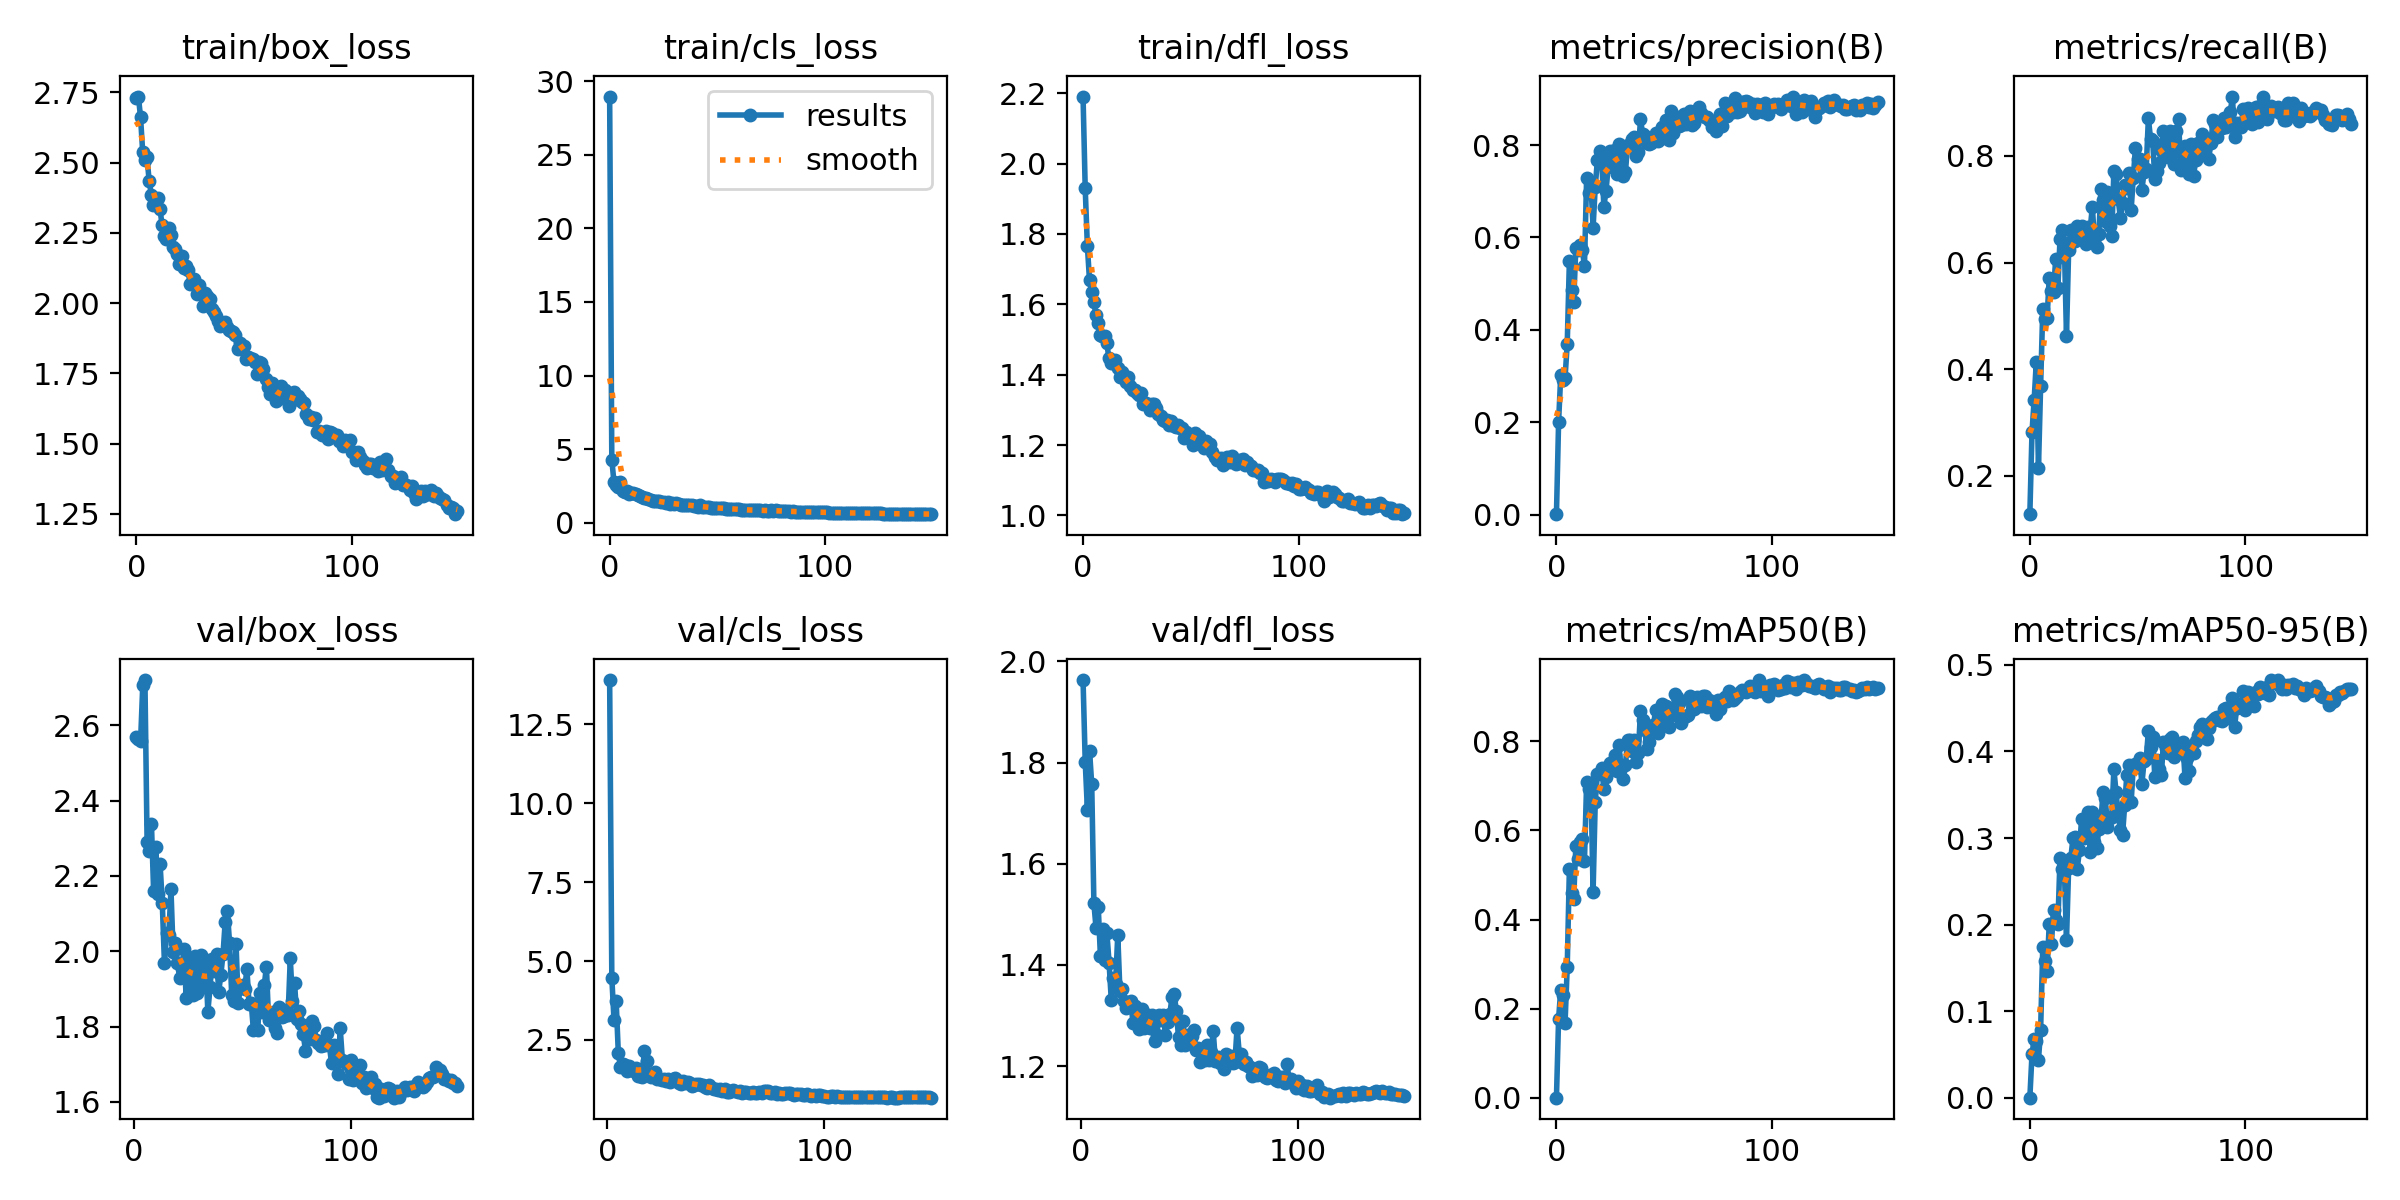

In [ ]:
Image(filename=f'{HOME}/runs/detect/yolov8l-pt/results.png', width=600)

In [ ]:
# see what difference another 50 epoch made
#Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

In [ ]:
#Test images save_txt=True save_conf=True
#!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images line_width=1 show_labels=False

Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/157 /content/dot-finder-2/test/images/105b_jpg.rf.dc750e5fa414456667f9dc8dbf2a716f.jpg: 640x640 (no detections), 12.7ms
image 2/157 /content/dot-finder-2/test/images/10a_jpg.rf.804129a86ec13f3c4f110ec9b27d6c7b.jpg: 640x640 (no detections), 11.7ms
image 3/157 /content/dot-finder-2/test/images/115b_jpg.rf.4f75517fb7ffcf3a6628f1886eb1bc1a.jpg: 640x640 (no detections), 11.1ms
image 4/157 /content/dot-finder-2/test/images/116a_jpg.rf.d634c888bfea232d199f8738462ca077.jpg: 640x640 4 kangaroos, 11.2ms
image 5/157 /content/dot-finder-2/test/images/117b_jpg.rf.c4023bfd3aa6ea09c9a058b7077dbb1b.jpg: 640x640 2 kangaroos, 11.8ms
image 6/157 /content/dot-finder-2/test/images/118a_jpg.rf.eaf264342561aaeaa872c55f6bc09951.jpg: 640x640 5 kangaroos, 11.3ms
image 7/157 /content/dot-finder-2/test/images/122a_jpg.rf.7c9b78622969

In [ ]:
#!zip -r experiment3_training.zip {HOME}/runs/
#from google.colab import files
#files.download('/content/experiment3_training.zip')

updating: content/runs/detect/ (stored 0%)
updating: content/runs/detect/train/ (stored 0%)
updating: content/runs/detect/train/results.png (deflated 6%)
updating: content/runs/detect/train/val_batch2_pred.jpg (deflated 13%)
updating: content/runs/detect/train/weights/ (stored 0%)
updating: content/runs/detect/train/weights/best.pt (deflated 8%)
updating: content/runs/detect/train/weights/last.pt (deflated 8%)
updating: content/runs/detect/train/val_batch1_labels.jpg (deflated 12%)
updating: content/runs/detect/train/val_batch1_pred.jpg (deflated 11%)
updating: content/runs/detect/train/val_batch2_labels.jpg (deflated 13%)
updating: content/runs/detect/train/train_batch7720.jpg (deflated 6%)
updating: content/runs/detect/train/F1_curve.png (deflated 17%)
updating: content/runs/detect/train/events.out.tfevents.1689215359.0dd5f8d0ab3f.1600.2 (deflated 72%)
updating: content/runs/detect/train/val_batch0_labels.jpg (deflated 14%)
updating: content/runs/detect/train/train_batch2.jpg (deflat

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# training
!yolo task=detect mode=predict model={HOME}/runs/detect/yolov8l-pt/weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/exp3_testing/DJI_20230614214219_0001_T_point0 line_width=1 hide_labels=True save_txt=True save_conf=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/149 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214219_0001_T_point0/00001.jpg: 512x640 (no detections), 142.9ms
image 2/149 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214219_0001_T_point0/00002.jpg: 512x640 (no detections), 18.0ms
image 3/149 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214219_0001_T_point0/00003.jpg: 512x640 4 kangaroos, 12.9ms
image 4/149 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214219_0001_T_point0/00004.jpg: 512x640 5 kangaroos, 12.2ms
image 5/149 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214219_0001_T_point0/00005.jpg: 512x640 4 kangaroos, 12.1ms
image 6

In [ ]:
#DJI_20230614214504_0002_T_point6
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/exp3_testing/DJI_20230614214504_0002_T_point6 line_width=1 hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/240 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214504_0002_T_point6/00001.jpg: 512x640 11 kangaroos, 149.8ms
image 2/240 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214504_0002_T_point6/00002.jpg: 512x640 11 kangaroos, 12.8ms
image 3/240 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214504_0002_T_point6/00003.jpg: 512x640 10 kangaroos, 18.6ms
image 4/240 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214504_0002_T_point6/00004.jpg: 512x640 8 kangaroos, 13.5ms
image 5/240 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614214504_0002_T_point6/00005.jpg: 512x640 10 kangaroos, 12.7ms
image 6/240

In [ ]:
#DJI_20230614220047_0005_T_point31
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/exp3_testing/DJI_20230614220047_0005_T_point31 line_width=1 hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/180 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220047_0005_T_point31/00001.jpg: 512x640 (no detections), 141.7ms
image 2/180 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220047_0005_T_point31/00002.jpg: 512x640 (no detections), 15.3ms
image 3/180 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220047_0005_T_point31/00003.jpg: 512x640 1 kangaroo, 12.2ms
image 4/180 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220047_0005_T_point31/00004.jpg: 512x640 (no detections), 12.1ms
image 5/180 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220047_0005_T_point31/00005.jpg: 512x640 (no detections), 11

In [ ]:
#DJI_20230614220347_0006_T_point41
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/exp3_testing/DJI_20230614220347_0006_T_point41 line_width=1 hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/49 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220347_0006_T_point41/00001.jpg: 512x640 16 kangaroos, 143.5ms
image 2/49 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220347_0006_T_point41/00002.jpg: 512x640 21 kangaroos, 13.2ms
image 3/49 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220347_0006_T_point41/00003.jpg: 512x640 28 kangaroos, 13.0ms
image 4/49 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220347_0006_T_point41/00004.jpg: 512x640 25 kangaroos, 12.1ms
image 5/49 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614220347_0006_T_point41/00005.jpg: 512x640 25 kangaroos, 12.8ms
image 6/49

In [ ]:
#DJI_20230614215707_0004_T_point28
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/exp3_testing/DJI_20230614215707_0004_T_point28 line_width=1 hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/143 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215707_0004_T_point28/00001.jpg: 512x640 9 kangaroos, 141.5ms
image 2/143 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215707_0004_T_point28/00002.jpg: 512x640 9 kangaroos, 18.5ms
image 3/143 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215707_0004_T_point28/00003.jpg: 512x640 10 kangaroos, 13.4ms
image 4/143 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215707_0004_T_point28/00004.jpg: 512x640 9 kangaroos, 12.4ms
image 5/143 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215707_0004_T_point28/00005.jpg: 512x640 9 kangaroos, 11.9ms
image 6/1

In [ ]:
#\DJI_20230614215028_0003_T_point15
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/exp3_testing/DJI_20230614215028_0003_T_point15 line_width=1 hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (NVIDIA A100-SXM4-40GB, 40514MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/384 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215028_0003_T_point15/00001.jpg: 512x640 4 kangaroos, 141.9ms
image 2/384 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215028_0003_T_point15/00002.jpg: 512x640 4 kangaroos, 12.6ms
image 3/384 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215028_0003_T_point15/00003.jpg: 512x640 3 kangaroos, 12.4ms
image 4/384 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215028_0003_T_point15/00004.jpg: 512x640 4 kangaroos, 17.5ms
image 5/384 /content/drive/MyDrive/Colab Notebooks/exp3_testing/DJI_20230614215028_0003_T_point15/00005.jpg: 512x640 3 kangaroos, 14.0ms
image 6/38

# Nieve data
This next data was not seen by the model during training and is from the video named after the folder.

In [ ]:
!yolo task=detect mode=predict model=drive/MyDrive/Colab\ Notebooks/exp2_weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/DJI_20230615015254_0001_T_point0 line_width=1 hide_labels=True

WARNING ⚠️ 'hide_labels' is deprecated and will be removed in 'ultralytics 8.2' in the future. Please use 'show_labels' instead.
Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00001.jpg: 512x640 (no detections), 80.5ms
image 2/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00002.jpg: 512x640 (no detections), 15.5ms
image 3/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00003.jpg: 512x640 5 kangaroos, 15.7ms
image 4/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00004.jpg: 512x640 5 kangaroos, 57.7ms
image 5/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00005.jpg: 512x640 5 kangaroos, 15.6ms
image 6/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001

In [ ]:
!yolo task=detect mode=predict model=drive/MyDrive/Colab\ Notebooks/exp2_weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/DJI_20230615015254_0001_T_point0 line_width=1 show_labels=False save_txt=True save_conf=True

Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00001.jpg: 512x640 (no detections), 78.1ms
image 2/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00002.jpg: 512x640 (no detections), 15.5ms
image 3/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00003.jpg: 512x640 5 kangaroos, 15.5ms
image 4/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00004.jpg: 512x640 5 kangaroos, 20.7ms
image 5/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00005.jpg: 512x640 5 kangaroos, 15.6ms
image 6/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_point0/00006.jpg: 512x640 2 kangaroos, 15.6ms
image 7/365 /content/drive/MyDrive/Colab Notebooks/DJI_20230615015254_0001_T_poi

In [ ]:
!zip -r full_training_video_data.zip {HOME}/runs/detect/predict3
from google.colab import files
files.download('/content/full_training_video_data.zip')

  adding: content/runs/detect/predict3/ (stored 0%)
  adding: content/runs/detect/predict3/00064.jpg (deflated 12%)
  adding: content/runs/detect/predict3/00182.jpg (deflated 7%)
  adding: content/runs/detect/predict3/00208.jpg (deflated 8%)
  adding: content/runs/detect/predict3/00221.jpg (deflated 8%)
  adding: content/runs/detect/predict3/00298.jpg (deflated 5%)
  adding: content/runs/detect/predict3/00254.jpg (deflated 7%)
  adding: content/runs/detect/predict3/00272.jpg (deflated 7%)
  adding: content/runs/detect/predict3/00287.jpg (deflated 5%)
  adding: content/runs/detect/predict3/00130.jpg (deflated 11%)
  adding: content/runs/detect/predict3/00084.jpg (deflated 10%)
  adding: content/runs/detect/predict3/00138.jpg (deflated 9%)
  adding: content/runs/detect/predict3/00240.jpg (deflated 6%)
  adding: content/runs/detect/predict3/00224.jpg (deflated 8%)
  adding: content/runs/detect/predict3/00333.jpg (deflated 7%)
  adding: content/runs/detect/predict3/00174.jpg (deflated 6%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!yolo task=detect mode=predict model=drive/MyDrive/Colab\ Notebooks/exp2_weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/DJI_20230615020013_0002_T_point17 line_width=1 show_labels=False save_txt=True save_conf=True

Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/117 /content/drive/MyDrive/Colab Notebooks/DJI_20230615020013_0002_T_point17/00001.jpg: 512x640 (no detections), 75.7ms
image 2/117 /content/drive/MyDrive/Colab Notebooks/DJI_20230615020013_0002_T_point17/00002.jpg: 512x640 (no detections), 27.2ms
image 3/117 /content/drive/MyDrive/Colab Notebooks/DJI_20230615020013_0002_T_point17/00003.jpg: 512x640 (no detections), 15.7ms
image 4/117 /content/drive/MyDrive/Colab Notebooks/DJI_20230615020013_0002_T_point17/00004.jpg: 512x640 (no detections), 15.6ms
image 5/117 /content/drive/MyDrive/Colab Notebooks/DJI_20230615020013_0002_T_point17/00005.jpg: 512x640 (no detections), 15.5ms
image 6/117 /content/drive/MyDrive/Colab Notebooks/DJI_20230615020013_0002_T_point17/00006.jpg: 512x640 (no detections), 15.6ms
image 7/117 /content/drive/MyDrive/Colab Notebooks/DJI_202

In [ ]:
!zip -r nieve_data.zip {HOME}/runs/detect/predict4
from google.colab import files
files.download('/content/nieve_data.zip')

  adding: content/runs/detect/predict4/ (stored 0%)
  adding: content/runs/detect/predict4/00064.jpg (deflated 9%)
  adding: content/runs/detect/predict4/00084.jpg (deflated 7%)
  adding: content/runs/detect/predict4/00063.jpg (deflated 10%)
  adding: content/runs/detect/predict4/00098.jpg (deflated 6%)
  adding: content/runs/detect/predict4/00086.jpg (deflated 7%)
  adding: content/runs/detect/predict4/00046.jpg (deflated 8%)
  adding: content/runs/detect/predict4/00049.jpg (deflated 8%)
  adding: content/runs/detect/predict4/00018.jpg (deflated 10%)
  adding: content/runs/detect/predict4/00012.jpg (deflated 13%)
  adding: content/runs/detect/predict4/00050.jpg (deflated 8%)
  adding: content/runs/detect/predict4/00061.jpg (deflated 8%)
  adding: content/runs/detect/predict4/00042.jpg (deflated 8%)
  adding: content/runs/detect/predict4/00113.jpg (deflated 6%)
  adding: content/runs/detect/predict4/00040.jpg (deflated 8%)
  adding: content/runs/detect/predict4/00060.jpg (deflated 8%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import locale
from ultralytics import YOLO

locale.getpreferredencoding = lambda: "UTF-8"

!yolo task=detect mode=predict model=drive/MyDrive/Colab\ Notebooks/exp2_weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/DJI_20230614214219_0001_T_point0 line_width=1 show_labels=False save_txt=True save_conf=True


Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
YOLOv8l-p2 summary (fused): 327 layers, 42822420 parameters, 0 gradients

image 1/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00001.jpg: 512x640 (no detections), 65.6ms
image 2/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00002.jpg: 512x640 (no detections), 24.0ms
image 3/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00003.jpg: 512x640 3 kangaroos, 19.2ms
image 4/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00004.jpg: 512x640 3 kangaroos, 30.1ms
image 5/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00005.jpg: 512x640 3 kangaroos, 15.7ms
image 6/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00006.jpg: 512x640 3 kangaroos, 15.6ms
image 7/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_poi

In [ ]:
import os
from IPython.display import display, Image

HOME = os.getcwd()
!zip -r nieve_data2.zip {HOME}/runs/detect/predict
from google.colab import files
files.download('/content/nieve_data2.zip')

  adding: content/runs/detect/predict/ (stored 0%)
  adding: content/runs/detect/predict/00064.jpg (deflated 4%)
  adding: content/runs/detect/predict/00130.jpg (deflated 4%)
  adding: content/runs/detect/predict/00084.jpg (deflated 4%)
  adding: content/runs/detect/predict/00138.jpg (deflated 4%)
  adding: content/runs/detect/predict/00063.jpg (deflated 4%)
  adding: content/runs/detect/predict/00098.jpg (deflated 4%)
  adding: content/runs/detect/predict/00086.jpg (deflated 4%)
  adding: content/runs/detect/predict/00046.jpg (deflated 4%)
  adding: content/runs/detect/predict/00132.jpg (deflated 4%)
  adding: content/runs/detect/predict/00049.jpg (deflated 4%)
  adding: content/runs/detect/predict/00146.jpg (deflated 4%)
  adding: content/runs/detect/predict/00018.jpg (deflated 3%)
  adding: content/runs/detect/predict/00012.jpg (deflated 4%)
  adding: content/runs/detect/predict/00050.jpg (deflated 4%)
  adding: content/runs/detect/predict/00061.jpg (deflated 4%)
  adding: content/r

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# model exp1
!yolo task=detect mode=predict model=drive/MyDrive/Colab\ Notebooks/exp1_weights/best.pt conf=0.25 source=drive/MyDrive/Colab\ Notebooks/DJI_20230614214219_0001_T_point0 line_width=1 show_labels=False save_txt=True save_conf=True


Ultralytics YOLOv8.0.128 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla V100-SXM2-16GB, 16151MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients

image 1/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00001.jpg: 512x640 (no detections), 57.8ms
image 2/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00002.jpg: 512x640 (no detections), 13.0ms
image 3/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00003.jpg: 512x640 2 kangaroos, 12.7ms
image 4/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00004.jpg: 512x640 2 kangaroos, 12.7ms
image 5/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00005.jpg: 512x640 2 kangaroos, 12.8ms
image 6/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/00006.jpg: 512x640 2 kangaroos, 12.8ms
image 7/149 /content/drive/MyDrive/Colab Notebooks/DJI_20230614214219_0001_T_point0/0

In [ ]:
!zip -r nieve_data2_exp1.zip {HOME}/runs/detect/predict2
from google.colab import files
files.download('/content/nieve_data2_exp1.zip')

  adding: content/runs/detect/predict2/ (stored 0%)
  adding: content/runs/detect/predict2/00064.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00130.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00084.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00138.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00063.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00098.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00086.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00046.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00132.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00049.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00146.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00018.jpg (deflated 3%)
  adding: content/runs/detect/predict2/00012.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00050.jpg (deflated 4%)
  adding: content/runs/detect/predict2/00061.jpg (deflated 4%)
  a

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>